In [25]:
import os
import cv2

def preprocess_folder(input_dir, output_dir, size=(48, 48)):
    """
    Preprocess all symbol images in input_dir and save to output_dir.
    Steps: Grayscale -> Threshold -> Invert -> Resize -> Save
    """
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(input_dir):
        class_input_path = os.path.join(input_dir, class_name)
        class_output_path = os.path.join(output_dir, class_name)
        os.makedirs(class_output_path, exist_ok=True)

        for img_name in os.listdir(class_input_path):
            img_path = os.path.join(class_input_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Skipped unreadable image: {img_path}")
                continue

            # Apply binary inverse thresholding (symbol becomes white on black)
            _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

            # Resize to the desired size (e.g., 28x28)
            resized = cv2.resize(thresh, size)

            # Save preprocessed image
            output_path = os.path.join(class_output_path, img_name)
            cv2.imwrite(output_path, resized)

    print(f"✅ Preprocessing complete for: {input_dir}")

In [26]:
if __name__ == "__main__":
    #Preprocess the training set
    preprocess_folder("C:\\Users\\wake up mr ramani\\Documents\\data\\final_output_images\\train", "C:\\Users\\wake up mr ramani\\Documents\\data\\preprocessed\\train")


✅ Preprocessing complete for: C:\Users\wake up mr ramani\Documents\data\final_output_images\train


In [27]:
#Preprocess the validation set
preprocess_folder("C:\\Users\\wake up mr ramani\\Documents\data\\final_output_images\\val", "C:\\Users\\wake up mr ramani\\Documents\\data\\preprocessed\\val")

✅ Preprocessing complete for: C:\Users\wake up mr ramani\Documents\data\final_output_images\val


In [28]:
# Importing Modules
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [29]:
# Setting the Parameters
img_height = 48
img_width = 48
batch_size = 32
epochs = 5

# Load the Data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\wake up mr ramani\\Documents\\data\\preprocessed\\train",
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    shuffle=True
)

Found 300746 files belonging to 82 classes.


In [30]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\wake up mr ramani\\Documents\\data\\preprocessed\\val",
    # Using val folder as Test
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Found 75228 files belonging to 82 classes.
Classes: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']


In [31]:
# Prefetching for Speed
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
# Model definition
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

C:\Users\wake up mr ramani\Documents\symbol project\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
# Training the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/5
9399/9399 ━━━━━━━━━━━━━━━━━━━━ 470s 46ms/step - accuracy: 0.7873 - loss: 0.8324 - val_accuracy: 0.9381 - val_loss: 0.2061
Epoch 2/5
9399/9399 ━━━━━━━━━━━━━━━━━━━━ 431s 46ms/step - accuracy: 0.9218 - loss: 0.2589 - val_accuracy: 0.9532 - val_loss: 0.1520
Epoch 3/5
9399/9399 ━━━━━━━━━━━━━━━━━━━━ 289s 31ms/step - accuracy: 0.9410 - loss: 0.1873 - val_accuracy: 0.9634 - val_loss: 0.1161
Epoch 4/5
9399/9399 ━━━━━━━━━━━━━━━━━━━━ 246s 26ms/step - accuracy: 0.9509 - loss: 0.1523 - val_accuracy: 0.9649 - val_loss: 0.1063
Epoch 5/5
9399/9399 ━━━━━━━━━━━━━━━━━━━━ 223s 24ms/step - accuracy: 0.9574 - loss: 0.1305 - val_accuracy: 0.9713 - val_loss: 0.0888


In [35]:
# Save the Model
model.save("symbol_model_48x48_5epoch_Real_main_97val.keras")

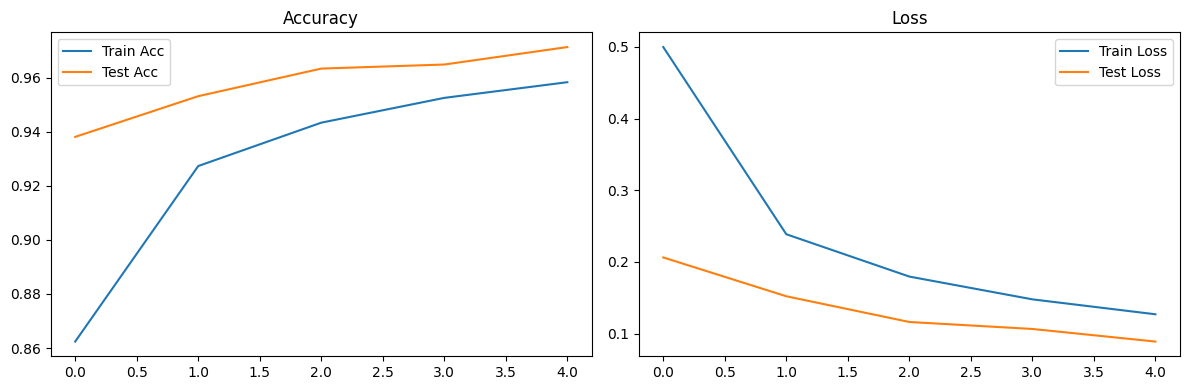

In [36]:
# Plotting the Results

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from collections import defaultdict

# Buffer for true/predicted labels
y_true = []
y_pred = []

# Keep track of how many samples collected per class
class_counts = defaultdict(int)

# Set the number of samples you want per class
max_samples_per_class = 5

# Optional: to avoid scanning too long
max_batches_to_scan = 500

print("Collecting up to 5 samples per class...")

for i, (images, labels) in enumerate(test_ds):
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)

    for img, true_label, pred_label in zip(images, labels.numpy(), preds):
        if class_counts[true_label] < max_samples_per_class:
            y_true.append(true_label)
            y_pred.append(pred_label)
            class_counts[true_label] += 1

    if len(class_counts) == len(class_names) and all(
        count >= max_samples_per_class for count in class_counts.values()):
        print(f"✅ Collected 5 samples for all {len(class_names)} classes.")
        break

    if i > max_batches_to_scan:
        print("⚠️ Stopped early. Not all classes reached 5 samples.")
        break

# Generate classification report
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    labels=np.arange(len(class_names)),
    zero_division=0
))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━

In [39]:
from sklearn.metrics import classification_report

labels = list(range(len(class_names)))

report = classification_report(
    y_true, y_pred,
    labels=labels,
    target_names=class_names,
    zero_division=0
)

with open("classification_report_final.txt", "w") as f:
    f.write(report)



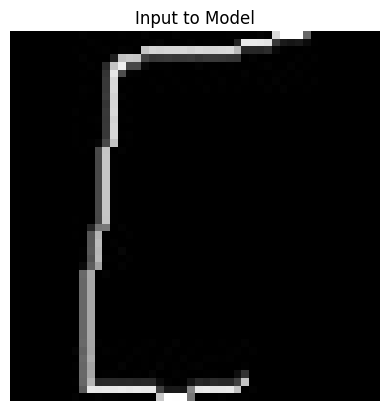

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted symbol: [


In [63]:
import cv2
import numpy as np

img_path = "C:\\Users\\wake up mr ramani\\Downloads\\pless.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# ✅ Check if image loaded properly
if img is None:
    raise ValueError(f"Failed to load image at: {img_path}")

# Resize to 48x48
img = cv2.resize(img, (48, 48))

img = np.expand_dims(img, axis=-1)  # (48, 48, 1)
img = np.expand_dims(img, axis=0)   # (1, 48, 48, 1)

plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title("Input to Model")
plt.axis('off')
plt.show()
pred = model.predict(img)
predicted_class_index = np.argmax(pred)
predicted_class = class_names[predicted_class_index]

# Step 7: Print result
print(f"Predicted symbol: {predicted_class}")


In [ ]:
"C:\\Users\\wake up mr ramani\\Downloads\\Image-Compressor.org_48x48_pha_symbol.jfif"